In [5]:
!pip install konlpy
!pip install koreanize-matplotlib

import pandas as pd
import numpy as np
import konlpy

import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [6]:
youtube_df = pd.read_csv('/content/재난문자 뉴스 댓글 크롤링.csv')
youtube_df

,댓글 내용
0,전쟁휴전 국가에서 심지어 주적이 핵미사일까지 들고있는 상황인데 국민들은 어디로 대피...
1,확실한건 서울에 사는사람이라면 더더욱이 전쟁에 항상 대비하시길 우리나의 대부분은 다...
2,반복되면 안되는 일이지만 이번 오발령으로 인해 부족한점도 알게되었고 혹시라도 있을 ...
3,잘했다. 이렇게 엉망인걸 알게 해줬으니.. 이제 개선을 하겠지?다음에도 또 엉망이면...
4,위급상황 대응이 엉망이란걸 이번에 알게됨. 우왕좌왕……;;;;;;
...,...
455,대피할장소는 초등학생들도배우는데 어른들이 대피장ㅅᆢ도모른다는것은 너무심각한데 무엇때...
456,왜 선제타격은 안 한거냐?
457,대국민 모닝콜! 다음에도 부탁드려요 잇힝
458,7시반에 일어나는데 6시반쯤에 깨워줘서 잠깐 사태파악 안됐다가 1시간 더 잘수있다는...


In [10]:
#댓글분석
okt = konlpy.tag.Okt()
word_df = pd.DataFrame({'word' : okt.nouns(' '.join(li for li in youtube_df['댓글 내용'].astype(str)))})

In [11]:
word_df['count'] = word_df['word'].str.len()
word_df

,word,count
0,전쟁,2
1,휴전,2
2,국가,2
3,심지어,3
4,주적,2
...,...,...
4538,반응,2
4539,쌍,1
4540,년도,2
4541,장난,2


In [12]:
group_df = word_df.groupby('word', as_index=False).agg(n=('word', 'count')).sort_values('n', ascending=False)
group_df

,word,n
307,대피,92
471,문자,79
691,상황,67
1124,전쟁,58
1239,진짜,52
...,...,...
638,비몽,1
640,비상식량,1
641,비소,1
642,비위,1


In [14]:
# 막대그래프
px.bar(group_df.head(20),x='word',y='n',text_auto=True)

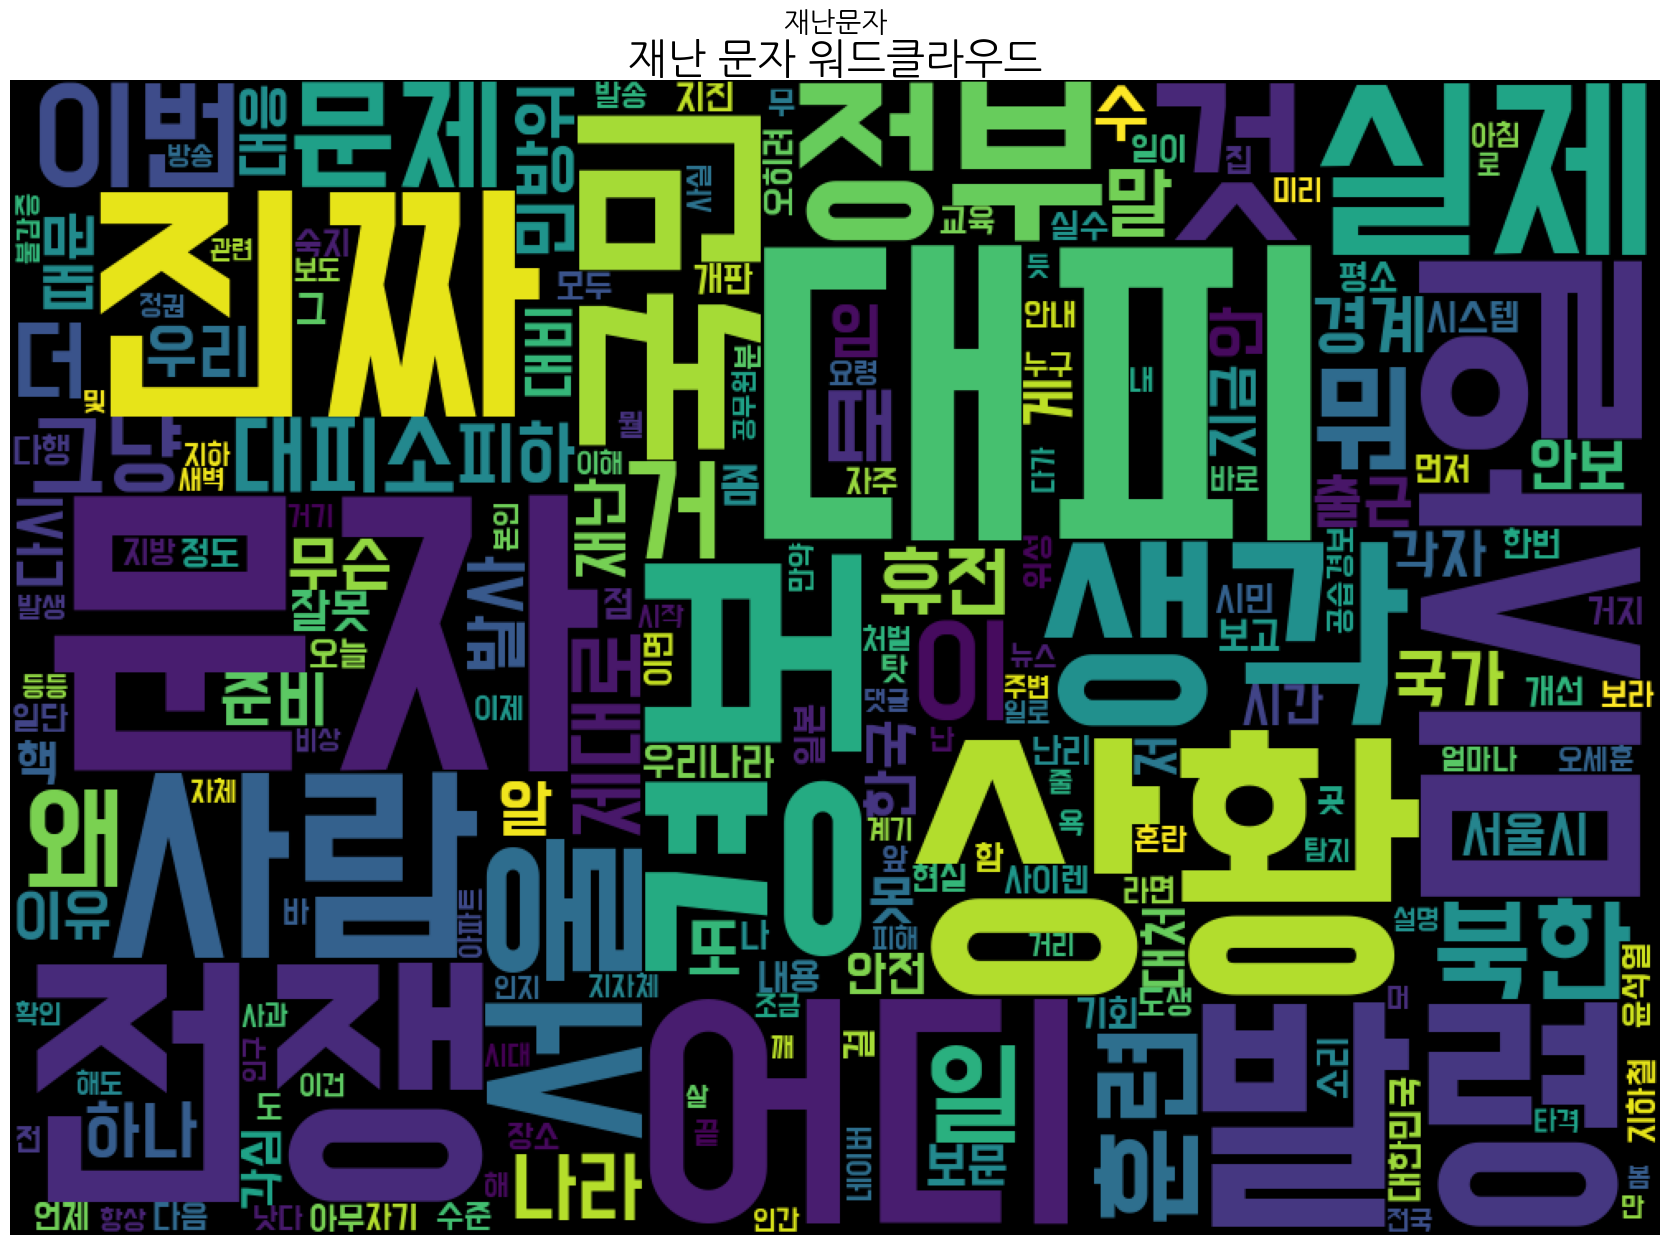

In [21]:
# 명사 빈도표 활용한 시각화
df = pd.read_csv('/content/재난문자 뉴스 댓글 크롤링.csv')
df

okt = konlpy.tag.Okt()
word_df = pd.DataFrame({'word':okt.nouns(''.join(w for w in df['댓글 내용'].astype(str)))})
word_df

word_df['count'] = word_df['word'].str.len()
word_df

group_df = word_df.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
group_df

px.bar(group_df.head(20),x='word',y='n',text_auto=True)

dic_word = group_df.set_index('word').to_dict()['n']
dic_word

font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize = (25,15))

wc = WordCloud(width=1000,height=700,font_path=font_path,).generate_from_frequencies(dic_word)

plt.imshow(wc)
plt.axis('off')

# 제목과 실종자 단어 추가
plt.title('재난 문자 워드클라우드', fontsize=30)
plt.text(0.5, 1.05, '재난문자', ha='center', va='center', fontsize=20, transform=plt.gca().transAxes)

plt.show()
